In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import randint

In [4]:
# Define colors to use for cells

from matplotlib.colors import ListedColormap

ALIVE=[.9, .7, .8]
DEAD=[.1,.3,.2]

cmap = ListedColormap([ALIVE, DEAD])

# Use with
# plt.matshow(g,cmap=cmap)

In [2]:
def hash_2d_array(array):
    # Convert each row to a tuple and then the whole array to a tuple of tuples
    array_tuple = tuple(tuple(row) for row in array)
    return hash(array_tuple)

In [15]:
import copy

def init_game(D: int):
    mem.clear()
    g = [[randint(0,1) for _ in range(D)] for _ in range(D)]
    return g, set()
    

def check_loop(g, memory):
    hash = hash_2d_array(g)

    print(len(mem))

    if hash in mem:
        return True

    mem.add(hash)
    return False

def gol(g):
    h = copy.deepcopy(g)
    D = len(g)

    for y, line in enumerate(g):
        for x, val in enumerate(line):
            alive_neighbors = 0

            for dy in range(-1, 2):
                for dx in range(-1, 2):
                    alive_neighbors += g[(y+dy)%D][(x+dx)%D]
            alive_neighbors -= val
            h[y][x] = 1 if (val == 0 and alive_neighbors == 3) or (val == 1 and (alive_neighbors == 2 or alive_neighbors == 3)) else 0
    return h

43


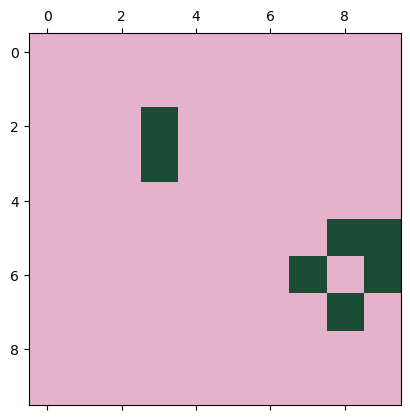

In [ ]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import time
from IPython import display
%matplotlib inline

D = 10
g, memory = init_game(D)

plt.matshow(g,cmap=cmap)

is_loop = False
while not is_loop:
    try:
        g = gol(g)
        is_loop = check_loop(g, memory)

        plt.matshow(g,cmap=cmap)

        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.01)
    except KeyboardInterrupt:
        break